<div style="font-variant: small-caps; 
      font-weight: normal; 
      font-size: 37px; 
      text-align: center; 
      padding: 15px; 
      margin: 10px;">
      <font color=orange> Pandas - Lab 2 </font><br>
</div> 

<div style="font-variant: small-caps; 
      font-weight: normal; 
      font-size: 35px; 
      text-align: center; 
      padding: 15px; 
      margin: 10px;">
      -<br>
</div> 



In [2]:
import pandas as pd

We are going to mine the [Online Shoppers Purchasing Intention Dataset](http://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)
from [Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets.php) of the University of California Irvine.

Our goal is to identify *customers* and *prospects* of the company, and further split customers into:
- risk-sensitive customers: customers who hesitate before purchase (check products informations, ratings, etc.)
- risk-insensitive customers: customers who probably know well the products they are looking for, and go straight for purchase

### Import and describe the dataset

Import the dataset, store it in your `data` folder, and describe its features.

What can you say about the "VisitorType", "ProductRelated", and "ProductRelated_Duration" features?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/Users/zhusijie/Desktop/Data Science/session2/online_shoppers_intention-UCI-ML.csv')
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
# VisitorType 
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
df.describe(exclude = np.number)

,Month,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3364,10551,9462,10422


In [8]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


<Axes: >

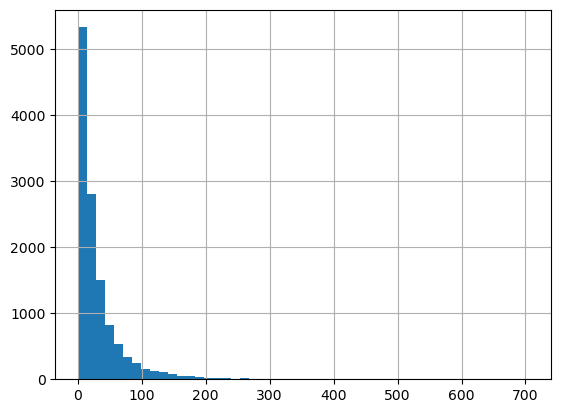

In [9]:
df['ProductRelated'].hist(bins=50)

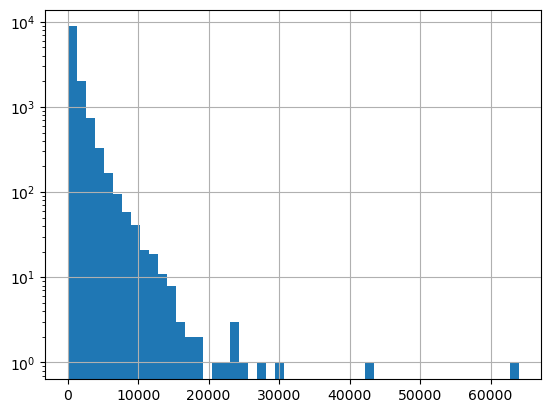

In [10]:
h = df['ProductRelated_Duration'].hist(bins=50)
h.set_yscale('log')

### Analysis of customers and prospects

#### 1. How many customers and how many prospects are there in the dataset? (you might ignore `Other` "VisitorType")

In [11]:
df.groupby('VisitorType').size()
# df['VisitorType'].value_counts()

VisitorType
New_Visitor           1694
Other                   85
Returning_Visitor    10551
dtype: int64

In [12]:
n_cust = 10551
n_pros = 1694

In [13]:
# the percentage of "other"
85/df.shape[0] # other accounts only 0.6%, so we just ignore it 

0.006893755068937551

#### 2. What are the empirical purchase rates of customers and of prospects? And the overall purchase rate?

In [14]:
# customers purchase rate
df[df['VisitorType']=='Returning_Visitor']['Revenue'].mean()

0.1393232868922377

In [15]:
# prospects purchase rate
df[df['VisitorType']=='New_Visitor']['Revenue'].mean()

0.24911452184179456

In [16]:
# overall purchase rate
df['Revenue'].mean()

0.15474452554744525

#### 3. What is the number of risk-insensitive customers? and the proportion of risk-sensitive among customers?

In [17]:
df_cust = df[df['VisitorType']=='Returning_Visitor']

<Axes: >

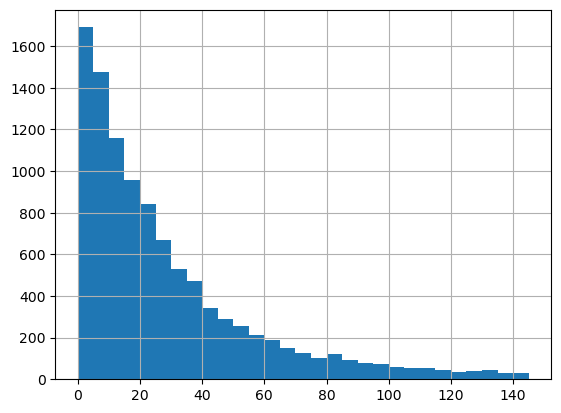

In [18]:
df_cust['ProductRelated'].hist(bins=[5*i for i in range(30)])

<Axes: >

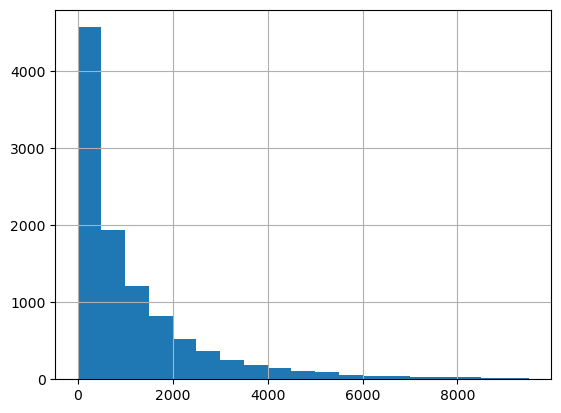

In [19]:
df_cust['ProductRelated_Duration'].hist(bins = [500*i for i in range(20)])

In [20]:
df_cust['duration_each_page'] = df_cust['ProductRelated_Duration']/df_cust['ProductRelated']

/var/folders/z0/4rcm9x5d39zdvklmt4flc2s40000gn/T/ipykernel_40605/3049561220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cust['duration_each_page'] = df_cust['ProductRelated_Duration']/df_cust['ProductRelated']


<Axes: >

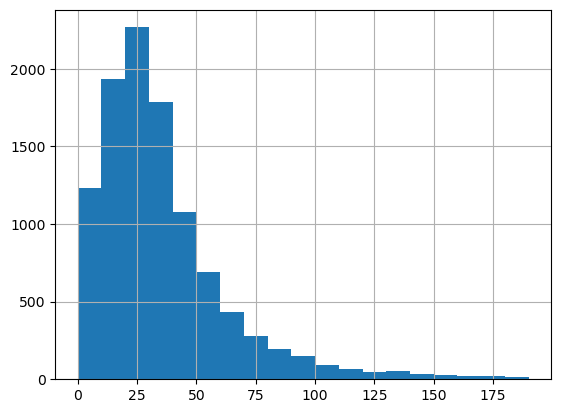

In [21]:
df_cust['duration_each_page'].hist(bins = [10*i for i in range(20)])

<Axes: >

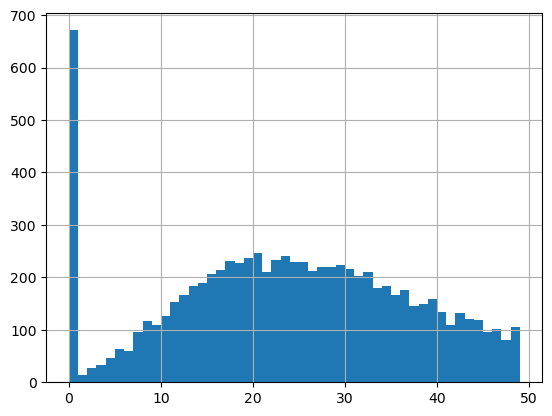

In [22]:
df_cust['duration_each_page'].hist(bins=[i for i in range(50)])

<Axes: >

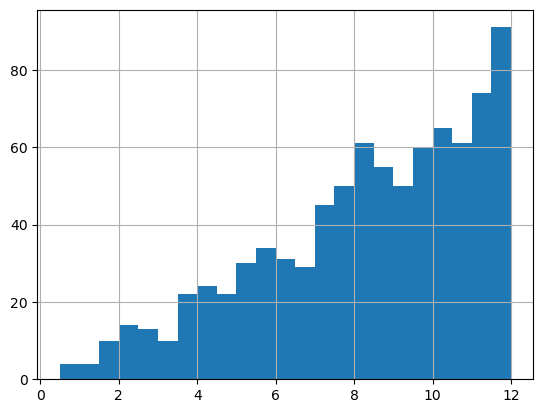

In [23]:
df_cust['duration_each_page'].hist(bins=[.5*i for i in range(1,25)])

In [24]:
df_cust['duration_each_page'].describe(percentiles=[.1*i for i in range(11)])

count    10520.000000
mean        38.051238
std         46.221460
min          0.000000
0%           0.000000
10%          8.341389
20%         15.250000
30%         19.947871
40%         24.410286
50%         29.199217
60%         34.355921
70%         41.025896
80%         51.316381
90%         71.079230
100%      1411.000000
max       1411.000000
Name: duration_each_page, dtype: float64

In [25]:
# we will choose the 10% quantile as the split point for the risk-insensitive customer
df_cust[df_cust['duration_each_page']<=8.341389].shape

(1052, 19)

#### 4. Among risk-sensitive customers, how many did place an order, and how many didn't? What are the corresponding proportions?

In [26]:
# risk-sensitive customers are the customers with a duration_each_page longer than 8.341389
df_cust[df_cust['duration_each_page']>8.341389].shape[0]

9468

In [27]:
# risk-sensitive customers who placed an order
df_cust[(df_cust['duration_each_page']>8.341389)& (df_cust['Revenue']==True)].shape[0]

1455

In [28]:
# order rate
1455/9468

0.15367553865652725

In [29]:
# risk-sensitive customers who didn't an order
df_cust[(df_cust['duration_each_page']>8.341389)& (df_cust['Revenue']==False)].shape[0]

8013

#### 5. Can you infer an empirical probability for a risk-sensitive customer to make a purchase?

We are looking for the conditionnal probability $\mathbb{P} ( pur | rsc )$, of a purchase event knowing that the visitor is a risk-sensitive customer.

We have the following formula :
$$
\mathbb{P} ( pur | rsc )  = 
\frac{\mathbb{P} ( rsc \cap pur ) }
{\mathbb{P} ( rsc  ) }
$$


The numerator is the proportion of RSC who purchased, and the denominator the proportion of rsc (both among all visitors), so we have:

In [30]:
# Numerator
numerrator = df_cust[(df_cust['duration_each_page']>=8.341389) &\
                     (df_cust['Revenue']==True)].shape[0]/len(df)

# Denominator
denominator = df_cust[df_cust['duration_each_page']>=8.341389].shape[0]/len(df)

# probability
p = round(numerrator/denominator, 4)
p

0.1537

According to the resulet, we can estimate that 15.37% `RSC` will purchase <br> 
We can estimate the same for `RIC` (Risk-Insensitive Customer) with the following formula : 
$$
\mathbb{P} ( pur | ric )  = 
\frac{\mathbb{P} ( ric \cap pur ) }
{\mathbb{P} ( ric  ) }
$$

In [31]:
# Numerator
numerrator_ric = df_cust[(df_cust['duration_each_page']<8.341389) &\
                     (df_cust['Revenue']==True)].shape[0]/len(df)

# Denominator
denominator_ric = df_cust[df_cust['duration_each_page']<8.341389].shape[0]/len(df)

# probability
p_ric = round(numerrator_ric/ denominator_ric, 4)
p_ric

0.0105

The result is not logical, since `RSC` has way heigher purchanse probability than `RIC` (almost 15 times), which is not likely to happen in real life. <br>
This means we should find another way to slipt the RSC/RIC, or we should choose a different shredhold istead of 8.341389

#### 6. Answer questions 4 and 5 for prospects.

- Question 4: Among risk-sensitive prospects, how many did place an order, and how many didn't? What are the corresponding proportions?

In [35]:
# find prospects
df_pros = df[df['VisitorType']=='New_Visitor']
df_pros['duration_each_page'] = df_pros['ProductRelated_Duration']/df_pros['ProductRelated']

# number of risk-sensitive prospects
n_rsp = df_pros[df_pros['duration_each_page']>= 8.341389].shape[0]
print(n_rsp)

# number of risk-sensitive prospects who placed an order
n_rsp_ordered = df_pros[(df_pros['duration_each_page']>= 8.341389)& (df_pros['Revenue']==True)].shape[0]
print(n_rsp_ordered)

# proportion of 
n_rsp_ordered/n_rsp
print(n_rsp_ordered/n_rsp)

# prospects who didn't placed an order and the porpotion
n_rsp_not_ordered = df_pros[(df_pros['duration_each_page']>= 8.341389)& (df_pros['Revenue']==False)].shape[0]
print(n_rsp_not_ordered)

propotion = n_rsp_not_ordered/n_rsp
print(propotion)

1587
405
0.2551984877126654
1182
0.7448015122873346


/var/folders/z0/4rcm9x5d39zdvklmt4flc2s40000gn/T/ipykernel_40605/2129079712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pros['duration_each_page'] = df_pros['ProductRelated_Duration']/df_pros['ProductRelated']


- Question 5 : Can you infer an empirical probability for a risk-sensitive prospects to make a purchase?

We are looking for the conditionnal probability $\mathbb{P} ( pur | rsp )$, of a purchase event knowing that the visitor is a risk-sensitive prospects.

We have the following formula :
$$
\mathbb{P} ( pur | rsp )  = 
\frac{\mathbb{P} ( rsp \cap pur ) }
{\mathbb{P} ( rsp  ) }
$$

In [37]:
# Numerator 
numerator_rsp = n_rsp_ordered/len(df)

# Denominator 
denominator_rsp = n_rsp/len(df)

# P (pur|rsp)
p_rsp = numerator_rsp/denominator_rsp
p_rsp

0.25519848771266546

We can estimate that 25.5% `RSP`(Risk sensitive prospects) will purchase <br>
At the same time we can estimate the same for `RIP`(Risk insensitive prospect) with the following formular:
$$
\mathbb{P} ( pur | rip )  = 
\frac{\mathbb{P} ( rip \cap pur ) }
{\mathbb{P} ( rip  ) }
$$

In [38]:
# Numerator 
numerator_rip = df_pros[(df_pros['duration_each_page']< 8.341389)& (df_pros['Revenue']==True)].shape[0]/len(df)

# Denominator 
denominator_rip = df_pros[df_pros['duration_each_page']< 8.341389].shape[0]/len(df)

# P (pur|rsp)
p_rip = numerator_rip/denominator_rip
p_rip

0.15000000000000002

Acoording to the result, 15% `RIP`(Risk insensitive prospects) will purchase, this is lower than `RSP` (25%), which is not logical.
So the way we define RSP and RIP is not scientific, it's better to rebuid our model.

#### 7. What are the limits of this approach? Which other features would you like to include for this analysis?

The way we difine RSC and RIC is too abitrary, so the result doesn't look correct. According to our result, Risk sensitve customers have even higher purchanse rate than Risk insensitive customers. <br>
The other limit is that we only use one mesurement (duration_each_page) to split RSC and RIC, we shoul consider more features.<br>
I would like to explore Informational pages and Informational_Duration.<br>
We can make an hypothesis : Risk sensitive customer will view more more informational pages and spend more time to check infomation to low the risk.

In [64]:
df['duration_each_info']= df['Informational_Duration']/df['Informational']

<Axes: ylabel='Frequency'>

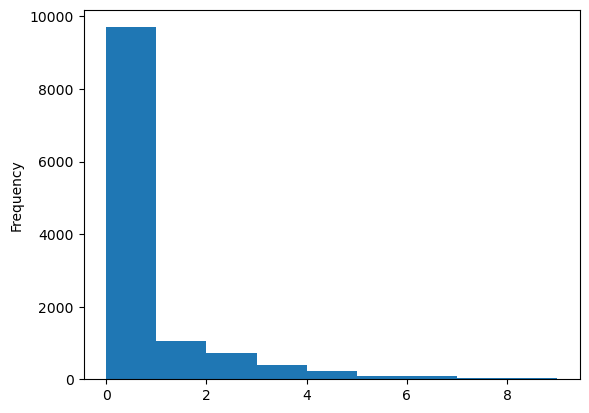

In [92]:
df['Informational'].plot(kind='hist', bins = [i for i in range(10)])

<Axes: ylabel='Frequency'>

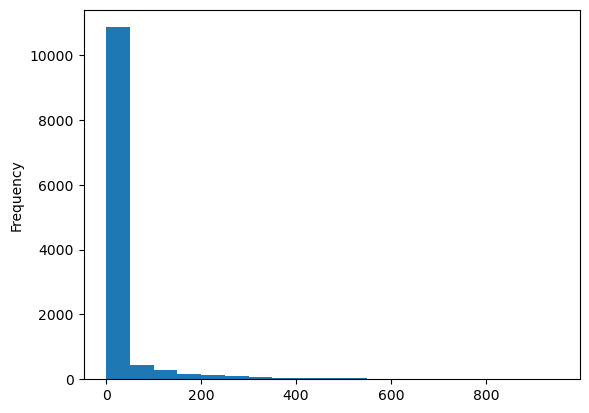

In [63]:
df['Informational_Duration'].plot(kind='hist', bins = [i*50 for i in range(20)])

<Axes: ylabel='Frequency'>

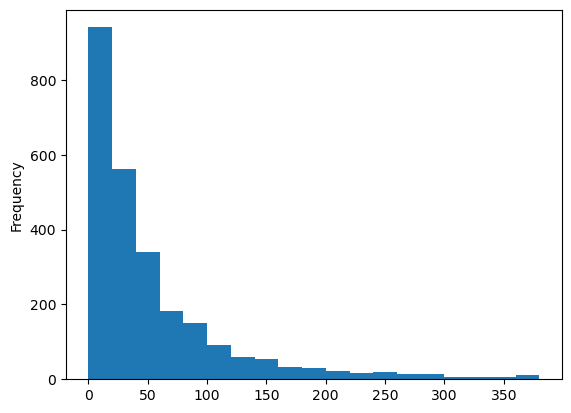

In [70]:
df['duration_each_info'].plot(kind='hist', bins=[i*20 for i in range(20)])

<Axes: ylabel='Frequency'>

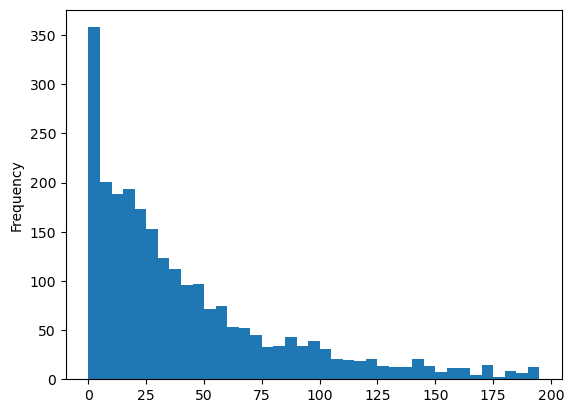

In [72]:
df['duration_each_info'].plot(kind='hist', bins=[i*5 for i in range(40)])

In [77]:
df['duration_each_info'].describe(percentiles=[0.1*i for i in range(11)])

count    2631.000000
mean       69.395551
std       127.882397
min         0.000000
0%          0.000000
10%         2.750000
20%         9.000000
30%        16.000000
40%        22.750000
50%        31.750000
60%        43.800000
70%        60.000000
80%        90.000000
90%       155.250000
100%     1778.000000
max      1778.000000
Name: duration_each_info, dtype: float64

According to the plot, let's consider the cut off to be at 25 senconds spent in average infomational page. <br>
Higher that that, we will consider that they may be risk sensitive. 

We are looking for the conditionnal probability $\mathbb{P} ( pur | rsc )$, of a purchase event knowing that the visitor is a risk-sensitive customer.

We have the following formula :
$$
\mathbb{P} ( pur | rsc )  = 
\frac{\mathbb{P} ( rsc \cap pur ) }
{\mathbb{P} ( rsc  ) }
$$


In [90]:
# numerator 
p1 = df[(df['duration_each_info']>=25) & (df['Revenue']==True) \
        & (df['VisitorType']=='Returning_Visitor')].shape[0]/len(df)

# denominator
p2 = df[(df['duration_each_info']>=25) &(df['VisitorType']=='Returning_Visitor')].shape[0]/len(df)

# P (pur/rsc)
p1/p2

0.257396449704142

we can calculate the purchase rate of Risk insensitive customer too <br>

We have the following formula :
$$
\mathbb{P} ( pur | ric )  = 
\frac{\mathbb{P} ( ric \cap pur ) }
{\mathbb{P} ( ric  ) }
$$

In [91]:
# numerator 
p3 = df[(df['duration_each_info']<25) & (df['Revenue']==True) \
        & (df['VisitorType']=='Returning_Visitor')].shape[0]/len(df)

# denominator
p4 = df[(df['duration_each_info']<25) &(df['VisitorType']=='Returning_Visitor')].shape[0]/len(df)

# P (pur/rsc)
p3/p4

0.20100502512562812

Still our result shows that : RSC has higher purchase rate than RIC, which is not logical. <br>
This can be caused by the feature we choosed. People who want to pruchase something may send longer time on infomational pages than those who have lower purchase intention. So it may not be a good choice to use "duration spent on each infomational page " as the condition to separate RSC and RIC.